- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается _п_, а кончается на _р_; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы _б_ и имеющее длину 8 символов
- Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте построить (через среднее каждой компоненты) наивный прогноз ряда.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from hmmlearn.hmm import GaussianHMM
from pathlib import Path

%matplotlib inline

## Война и мир

In [282]:
wap = ''
path = Path("c:\\", "Users", "Solnotka", "Netology_extra", "war_and_peace")

for filename in ['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']:
    path_loc = Path(path, filename)
    with open(path_loc, 'r', encoding='utf8') as f:
        text = f.read().lower()
        wap += text

wap = re.sub('[^а-я \s]','', wap)
wap = re.sub('\s+', ' ', wap)
print(len(wap))
print(wap[5000:6500])

2744245
принят государем вы знаете а я очень рад буду сказал князь скажите прибавил он как будто только что вспомнив чтото и особеннонебрежно тогда как то о чем он спрашивал было главною целью его посещения правда что императрицамать желает назначения барона функе первым секретарем в вену этот барон кажется ничтожная личность князь василий желал определить сына на это место которое через императрицу марию феодоровну старались доставить барону анна павловна почти закрыла глаза в знак того что ни она ни кто другой не могут судить про то что угодно или нравится императрице барон функе рекомендован императрицематери ее сестрою только сказала она грустным сухим тоном в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе много уважения и опять взг

In [39]:
#Убрала из алфавита "ё", потому что оно не встречается в тексте.
alphabet = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
pos = {l: i for i, l in enumerate(alphabet)}
probabilities = np.zeros((len(alphabet), len(alphabet)))

for fr, to in zip(wap[:-1], wap[1:]):
    probabilities[pos[fr], pos[to]] += 1

In [40]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
probabilities

array([[1.16777163e-04, 8.63089393e-03, 4.65993959e-02, ...,
        1.08868164e-02, 3.41095476e-02, 2.41617258e-01],
       [6.52445734e-02, 6.00180054e-04, 5.37661298e-03, ...,
        2.75082525e-04, 2.93087926e-02, 1.50795239e-02],
       [1.38951265e-01, 3.38240959e-04, 8.36206816e-04, ...,
        9.39558220e-06, 5.18636137e-03, 1.64601205e-01],
       ...,
       [1.41693234e-04, 7.91356713e-02, 0.00000000e+00, ...,
        7.01381509e-03, 0.00000000e+00, 5.66702090e-01],
       [3.94999309e-05, 2.01449647e-03, 1.53457231e-02, ...,
        6.22123911e-03, 8.70973476e-03, 5.85072976e-01],
       [1.41105026e-02, 4.42289642e-02, 9.17171417e-02, ...,
        1.95822895e-04, 8.50591633e-03, 0.00000000e+00]])

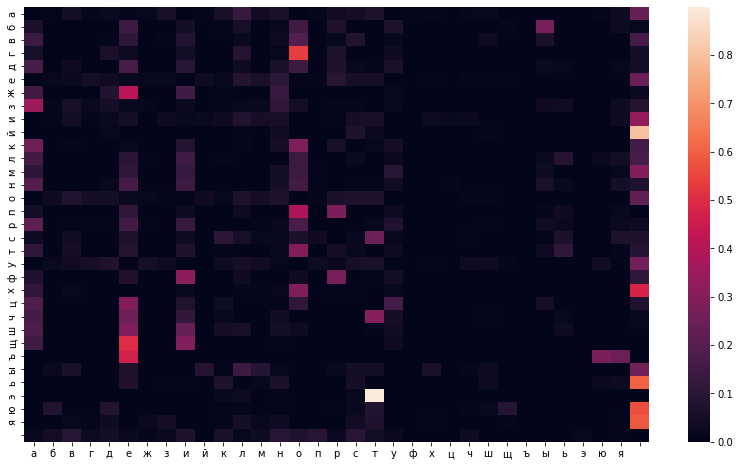

In [42]:
df = pd.DataFrame(probabilities, index=(letter for letter in alphabet), columns=(letter for letter in alphabet))
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [47]:
#Я поняла задание так, что перед строкой и после строки должны быть пробелы.
#Поэтому сразу посчитаю вероятность того, что пробел встретится перед "п" и после "р"
start = df.loc[' ', 'п']
finish = df.loc['р', ' ']
print(start)
print(finish)

0.09552781022735714
0.03464457163052335


In [130]:
words = {}
for sec in alphabet[:-1]:
    sec_prob = df.loc['п', sec]
    for third in alphabet[:-1]:
        third_prob = df.loc[sec, third]
        r_prob = df.loc[third, 'р']
        probability = start * sec_prob * third_prob * r_prob * finish
        words['п' + sec + third + 'р'] = probability

for i, word in enumerate(sorted(words, key=lambda x: words[x], reverse=True)):
    if words[word] > 0.0000005:
        print(f'{i + 1:>2}: {word} - {words[word]:.7f}')

 1: прер - 0.0000135
 2: прор - 0.0000103
 3: прар - 0.0000083
 4: потр - 0.0000048
 5: попр - 0.0000046
 6: погр - 0.0000043
 7: подр - 0.0000043
 8: побр - 0.0000033
 9: поер - 0.0000029
10: прур - 0.0000017
11: повр - 0.0000016
12: пепр - 0.0000013
13: пегр - 0.0000012
14: покр - 0.0000011
15: прир - 0.0000011
16: пофр - 0.0000011
17: петр - 0.0000010
18: педр - 0.0000010
19: плор - 0.0000009
20: плер - 0.0000009
21: пьер - 0.0000009
22: пеер - 0.0000008
23: пупр - 0.0000008
24: пртр - 0.0000007
25: прыр - 0.0000007
26: плар - 0.0000007
27: патр - 0.0000006
28: папр - 0.0000006
29: поср - 0.0000006
30: прдр - 0.0000006
31: пакр - 0.0000005
32: пудр - 0.0000005


Осмысленных слов в списке самых вероятных сочетаний два: "петр" и "пьер".

In [286]:
print(f'Количество строк вида "п**р" с ненулевой вероятностью: {len(list(filter(lambda x: words[x] !=0, words)))} из {len(alphabet[:-1]) ** 2} возможных')
print(f'Вероятность встретить строку вида "п**р": {sum(words.values()):.10f}')

Количество строк вида "п**р" с ненулевой вероятностью: 517 из 1024 возможных
Вероятность встретить строку вида "п**р": 0.0000905754


In [296]:
#Получаю случайное слово на букву "б". Предполагаю, что в нем не должно быть пробелов.
s = ['б']
for _ in range(7):
    probabilities = list(df.loc[s[-1]])
    letter = ' '
    while letter == ' ':
        letter = np.random.choice(list(alphabet), p=probabilities)
    s.append(letter)
print(''.join(s))

бинилета


## Прогноз для временного ряда

In [148]:
temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']
values = temp.values.reshape(-1, 1)

In [275]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))
    print(model.monitor_)

1 -855.6201905961935
ConvergenceMonitor(
    history=[-855.6212419847571, -855.6201905961935],
    iter=2,
    n_iter=1000,
    tol=0.01,
    verbose=False,
)
2 -767.922057651321
ConvergenceMonitor(
    history=[-871.2574700272949, -816.8381526513103, -780.7214790955271, -769.0150956196561, -767.9767556862904, -767.9277707070573, -767.9237021706059],
    iter=7,
    n_iter=1000,
    tol=0.01,
    verbose=False,
)
3 -729.7130998068997
ConvergenceMonitor(
    history=[-874.9086667791026, -817.602562357455, -775.5030844388762, -752.8086757595626, -740.5699810811517, -733.2850786356621, -730.6576505352856, -730.044711237568, -729.8986384599947, -729.8406869132286, -729.8047661806494, -729.7785592877946, -729.758529133289, -729.7429435037468, -729.730675329025, -729.7209224863002],
    iter=16,
    n_iter=1000,
    tol=0.01,
    verbose=False,
)
4 -698.3660113756838
ConvergenceMonitor(
    history=[-874.0574284181288, -818.0475673624178, -775.8353336600896, -752.9178790757844, -740.92778868

13 -536.8245290888325
ConvergenceMonitor(
    history=[-897.0160259816782, -805.5880257411401, -765.4435684949916, -747.7869964000943, -737.0214891069663, -727.7521261006383, -718.7021976621296, -706.242392272752, -685.531476383289, -660.2274441719245, -642.1300693814737, -630.5338671565048, -619.2914893033709, -607.3037213030157, -598.2517802611245, -592.4023994866717, -587.7842650449819, -583.7873192461736, -580.0452951618794, -576.3374434690495, -572.7761652482139, -569.3360016035389, -565.3808455196139, -559.7684108781573, -552.9643796260615, -547.4702528472928, -544.5380427956095, -543.2824050045256, -542.2830028718886, -541.4863332255605, -540.8666201457041, -540.3718316670598, -539.9344604903795, -539.496433048156, -539.0409763210644, -538.568631839916, -538.0716235891344, -537.6235190829894, -537.3304729323328, -537.1753449459343, -537.0891060982655, -537.0322395906205, -536.9897176811284, -536.9558545141609, -536.928030214947, -536.9047803170591, -536.8851850220689, -536.86861

In [279]:
#Во всех случаях количество итераций не превышает 100. Количество компонентов сделала максимальным
model = GaussianHMM(n_components=13,
                        covariance_type="diag",
                        n_iter=100)
model.fit(values)

# Прогнозные значения получаю тем же способом, что и случайное слово на букву "б" в предыдущем задании.
labels = list(model.predict(values))
for _ in range(50):
    probabilities = model.transmat_[labels[-1]]
    label = np.random.choice(range(model.n_components), p=probabilities)
    labels.append(label)
labels = np.array(labels)

means = np.zeros_like(labels)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

model.score(values)

-536.8180504907169

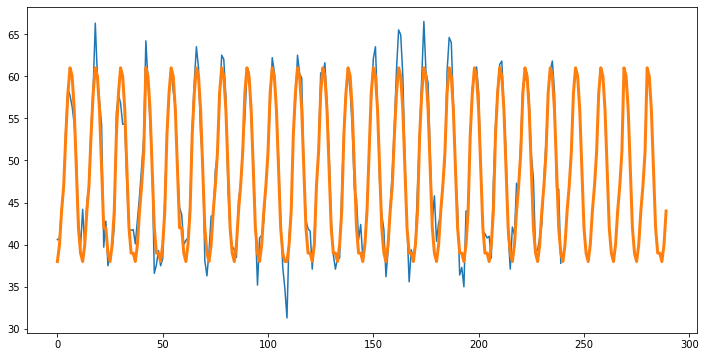

In [280]:
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Судя по графику, прогноз получился довольно точным, колебания со временем не затухают.